# LENET ARCHITECTURE

In [26]:
import warnings
warnings.filterwarnings('ignore')

# import os
# os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

In [27]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

2.15.0


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 2002 images belonging to 20 classes.


In [29]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                    batch_size=32,class_mode='categorical')

Found 2005 images belonging to 20 classes.


In [30]:
MODEL=Sequential()
MODEL.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3), input_shape=(224,224,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(3,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Flatten())
MODEL.add(Dense(256, activation='relu'))
MODEL.add(Dense(20, activation='softmax'))

OPT    = tensorflow.keras.optimizers.Adam(0.001)

MODEL.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=["accuracy", tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()])
MODEL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [31]:
model_path = "LENET.h5"

from tensorflow.keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [32]:
epochs = 100
batch_size = 128

In [33]:
WORKING = MODEL.fit_generator(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 2.9963 - accuracy: 0.0601 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 1: accuracy improved from -inf to 0.06009, saving model to LENET.h5
15/15 [==============================] - 16s 1s/step - loss: 2.9963 - accuracy: 0.0601 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 2.9382 - val_accuracy: 0.1271 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 2.8673 - accuracy: 0.1292 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2: accuracy improved from 0.06009 to 0.12917, saving model to LENET.h5
15/15 [==============================] - 13s 871ms/step - loss: 2.8673 - accuracy: 0.1292 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 2.6805 - val_accuracy: 0.1979 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 2.5792 - accuracy: 

In [34]:
WORKING.history.keys()


dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

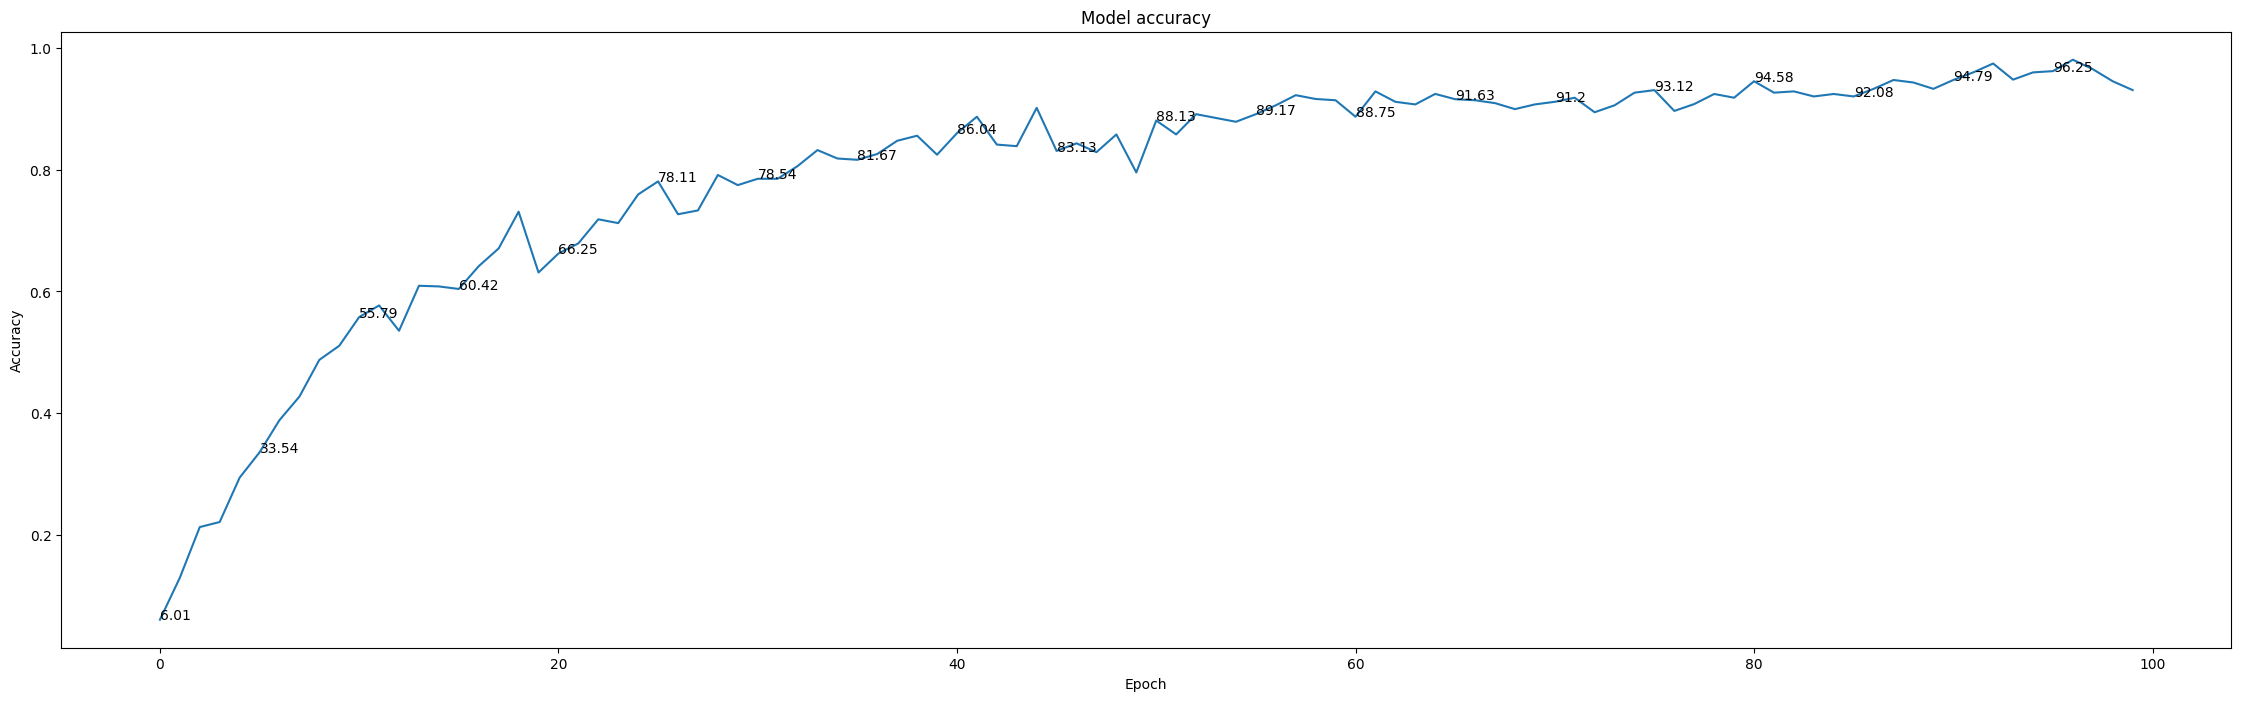

In [35]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(28, 8))
plt.plot(WORKING.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['accuracy'][i]*100,2),xy=(i,WORKING.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [36]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 8))
plt.plot(history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['loss'][i]*100,2),xy=(i,WORKING.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

NameError: name 'history' is not defined

<Figure size 2000x800 with 0 Axes>